## <center> Go to piazza and open today's lecture notes in the hub! </center>
## <center> https://piazza.com/class/jzioyk40mhs6r2 </center>
## <center> Let's go to tophat for attendance! </center>
## <center> https://app.tophat.com/e/245218 </center>

## Recap from last time
- which problems can be solved by ML and why
- sueprvised and unsupervised ML
- bias-variance tradeoff

####  Let's revisit some of these topics before we move on!


### Easy questions:
- In clustering, can we predict the cluster probabilities of a point?
   - not with sklearn. sklearn clustering algorithms only return the most likely cluster
- Is unsupervised ML always clustering?
   - no. outlier detection and dimensionality reduction are also considered unsupervised ML
- Why is supervised ML called supervised?
   - due to the training labels, the answers to the task are known which can be thought of as a teacher checking the answers of the ML algorithm and iteratively correcting them.

## Example: the adult dataset

https://archive.ics.uci.edu/ml/datasets/Adult

- census data on ~30.000 people from 1994
- features such as age, education level, marital status, gender, race, #hours worked /  week, home country, do they earn more or less than 50k?
- what can you do with the data?

### What can you do with the data?
- classification questions
    - predict of someone earns more or less than 50k  based on the other features
    - study gender inequality: make gender the target variable
    - study racial inequality: make race the target variable
- regression questions
    - predict the age of someone
    - predict how many hours a week they work
- unsupervised ML questions
    - use all features and look for groups of similar people
    - look for outliers


### Supervised vs unsupervised ML
- supervised ML
   - you have labelled data points: X feature matrix and y target variable.
   - you want to create a function f that can map X to y accurately. 
   - you will then give new feature values (X_new) as input to f and it will return estimated target variables (y_new')
   - f(x_new_i) = y_new_i'

| X|feature_1|feature_2|...|feature_j|...|feature_m|<font color='red'>y</font>|
|-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|__data_point_1__|x_11|x_12|...|x_1j|...|x_1m|__<font color='red'>y_1</font>__|
|__data_point_2__|x_21|x_22|...|x_2j|...|x_2m|__<font color='red'>y_2</font>__|
|__...__|...|...|...|...|...|...|__<font color='red'>...</font>__|
|__data_point_i__|x_i1|x_i2|...|x_ij|...|x_im|__<font color='red'>y_i</font>__|
|__...__|...|...|...|...|...|...|__<font color='red'>...</font>__|
|__data_point_n__|x_n1|x_n2|...|x_nj|...|x_nm|__<font color='red'>y_n</font>__|

   - if y is categorical, we train a classification model
   - if y is continuous, we train a regression model

### Supervised vs unsupervised ML
- unsupervised ML: there is no target variable that you are specifically interested in.
   - you want to find structure/groups/clusters in your data (e.g., customer segmentation)
   - you want to find outliers in your data

| X|feature_1|feature_2|...|feature_j|...|feature_m|
|-|:-:|:-:|:-:|:-:|:-:|:-:|
|__data_point_1__|x_11|x_12|...|x_1j|...|x_1m|
|__data_point_2__|x_21|x_22|...|x_2j|...|x_2m|
|__...__|...|...|...|...|...|...|
|__data_point_i__|x_i1|x_i2|...|x_ij|...|x_im|
|__...__|...|...|...|...|...|...|
|__data_point_n__|x_n1|x_n2|...|x_nj|...|x_nm|


If something is still unclear, come to my office hour today.

You can also read chapter 1 of the "Hands-On Machine Learning with Scikit-Learn and TensorFlow" from Geron.

http://shop.oreilly.com/product/0636920052289.do

Or check the python data science handbook's relevant chapter.

https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html


# <center>Overview of Machine Learning, part 2</center>

### By the end of this lecture, you will be able to
   - Describe the bias-variance tradeoff
   - Summarize the main steps of the ML workflow

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - **Describe the bias-variance tradeoff**
   - <font color='LIGHTGRAY'>Summarize the main steps of the ML workflow</font>

## <center>An example</center>

### <center>Fit a polynomial to these points using linear regression!</center>

<center><img src="polifit_nomodel.jpg" width="500"></center>


### The linear regression model:

##### <center> $y' = \beta_0 + \sum_{j=1}^{d} \beta_j $ $f_j$ $ = \beta_0 + \sum_{j=1}^{d} \beta_j x^j$, </center>

where $d$ is the highest degree of the polynomial. E.g., if d = 3, $y' = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$.

### The max degree of the polynomial ($d$) is a hyperparameter.
- You decide what the value should be and you can change it.

### The coefficients of the polynomial are parameters.
- The ML algorithm calculates $\beta_0, \beta_1, \beta_2, \beta_3, ...$ for you to minimize the error on the training data.

### <center> First order polynomial</center>
<center><img src="polifit_1.jpg" width="500"></center>

#### <center>$y' = 0.81 -2.3x$</center>


### <center> Fifth order polynomial</center>

<center><img src="polifit_5.jpg" width="500"></center>

#### <center>$y' = 1.1 -2.38  x + 5.45  x^2 - 44.7  x^3 + 75.33  x^4 - 34.87  x^5$</center>


### <center> 15th order polynomial</center>

<center><img src="polifit_15.jpg" width="500"></center>

#### <center> $y' = 0.89 + 37.18  x - 1920.98  x^2 + 43413.38  x^3 - 569919.88  x^4 + 4895023.25  x^5 - 29367547.19  x^6 + 127247890.38  x^7 - 404130483.77  x^8 + 943928768.95  x^9 - 1612574098.44  x^{10} + 1984508923.6  x^{11} - 1708405945.73  x^{12} + 974446430.21  x^{13}-330357881.78  x^{14}+50337433.06  x^{15} $</center>

The figure below shows the MSE of the training data as a function of the polynomial degree:

<center><img src="MSE_train.jpg" width="500"></center>

### Let's add a couple of new points to the plot!
<center><img src="polifit2.jpg" width="500"></center>


### Here are a couple of fitted polynomials (y').

<center><img src="polifit_fits.jpg" width="500"></center>

<center>What is the MSE of new data points as a function of $d$?</center>

<center>$MSE(y,y') = \frac{1}{n}\sum_{i=1}^{n}(y_i-y_i')^2$</center>

#####  <center>Make a sketch and explain your prediction!</center>


<center><img src="MSE_train_test.jpg" width="600"></center>


### <center> The bias-variance tradeoff </center>

<center><img src="MSE_train_test.jpg" width="400"></center>

 High Bias: If a model is too simple, it performs poorly on both training data and on new data points.
 
 High Variance: If a model is too complex, it performs accurately on the training data but it does not generalize to new data points

 The goal of the ML pipeline is to find the optimum between high bias and high variance.


### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - <font color='LIGHTGRAY'>Describe the bias-variance tradeoff</font>
   - **Summarize the main steps of the ML workflow**

## <center>A typical ML pipeline</center>

### Goal 1: Find balance between bias and variance! Develop a model which generalizes to new data points.

### Goal 2: Report the model performance one should expect on previously unseen data!

## The supervised ML pipeline
Most of the course is about supervised ML.
Required steps are highlighted.

1. **Preprocessing (two lectures)**

    1.1 Scale continuous features 
    
    1.2 One-hot encode categorical features - necessary if you have categorical features
    
    1.3 Impute missing values - not necessary if you use an ML method that runs with nans

2. **Exploratory  Data  Analysis (two lectures)** - highly recommended, you need to understand your data!

3. Dimensionality reduction (one lecture) - necessary if your data has too many features (#features >> #points)

4. Feature engineering (one lecture) - recommended but often requires expert knowledge

5. **Select your evaluation metric (two lectures)** - depends on the priorities of stakeholders

6. **Put together  the cross-validation pipeline (two lectures)** - practicioners often make errors in this step
   - split the data into three parts (train, CV, test)
   - decide which model hyperparameters you want to tune and what values you want to try
   - loop through all hyperparameter combinations
      - train a model
      - evaluate the CV set
   - find the hyperparameter combination that optimizes the CV metric
   - apply that one model on the test set and report the metric 
      - this is how your model generalizes to previously unseen data

7. **Train multiple models using multiple ML algorithms (two lectures)** - practicioners often make errors in this step

8. **Interpret your model (one lecture)** - black boxes are often not useful

### Some notes and advice

- The course is linear but model development is not!
   - Put together an ML pipeline using simple features and get a base score.
   - Change one thing at a time in your pipeline and track how the score changes. 
      - keep changes that improve the score, discard changes that don't impact or reduce the score
   - Keep track of your changes!
- You cannot do too much EDA!
- Always check if the model makes sense and the predictions are realistic - interpretability is key!
- Carefully check outliers in regression and misclassified points in classification
   - some not so obvious errors can be identified this way


## What can go wrong?

Issues with the data:
   - not enough training data
   - training data is not representative of the cases you want to generalize to
   - poor quality (noisy) data
   - too many irrelevant features

Issues with the model:
   - overfitting and underfitting: solved by cross-validation and hyperparameter tuning
   - model is not right for the data: model is too simplistic or too complex

## Ethical concerns in ML
- ML models learn human biases
   - who should get credit from the bank?
   - student admissions
   - employee hires
   - court: who will likely relapse into criminal behavior? Influences the length of the sentence
- if past decisions are biased (e.g., racist or sexist), the ML model will learn and propagate these biases
   - ML conserves the status quo when human decisions are automatized


# <center>Summary </center>
### Now you can
   - Describe the bias-variance tradeoff
   - Summarize the main steps of the ML workflow


## ML vs. statistics
- Both work with data but have different goals.

### Statistics: your data (*x*) is a sample from an underlying distribution
   - descriptive statistics: describe the properties of the sample *x* (e.g., mean and stdev)
   - inferential statistics: infer the properties of the underlying distribution 
      - compare the sample (*x)* to another observed sample or to a synthetic sample drawn from an idealized model (*x_other*)
      - null hypothesis (one example): there is no difference between the means or variances of the underlying distributions of the two samples
      - statistical tests are used to quantify the sense in which the null can be proven false - **statistical significance**


### Machine Learning: your data (*x*) is an input for a predictive model
- forecast unobserved outcomes and future behavior
- unsupervised ML: *x* is used to find structure in the data e.g., clusters and predict/decide to which cluster new points belong
- supervised ML: x and output data y are used to train a model to predict *y_new* for new data *x_new*
- **predictive power**

## Note
- statistical significance != predictive power
- https://www.pnas.org/content/pnas/112/45/13892.full.pdf
- a statistically significant correlation is not necessarily predictive


In [10]:
import pandas as pd
import numpy as np
import sys
from sklearn.model_selection import train_test_split
from matplotlib import pylab as plt
import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline

# scikit-learn code is reproducable is the random seed is fixed.
np.random.seed(10)

# 0) read in the data
# our toy dataset, we don't know how it was generated.
df = pd.read_csv('toy_data.csv')

X = df[['x1','x2']].values
y = df['y'].values

# 1) preprocessing
# not necessary, data is too simplistic

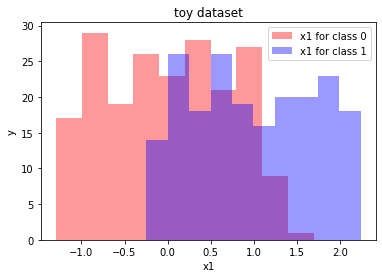

In [11]:
# 2) EDA

plt.hist(X[y==0,0],alpha=0.4,color='r',label='x1 for class 0')
plt.hist(X[y==1,0],alpha=0.4,color='b',label='x1 for class 1')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('toy dataset')
plt.legend()
plt.show()

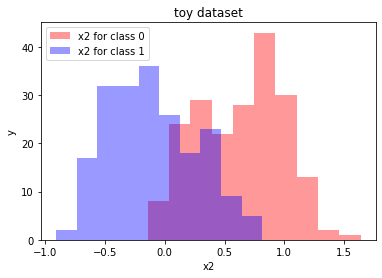

In [12]:
plt.hist(X[y==0,1],alpha=0.4,color='r',label='x2 for class 0')
plt.hist(X[y==1,1],alpha=0.4,color='b',label='x2 for class 1')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('toy dataset')
plt.legend()
plt.show()

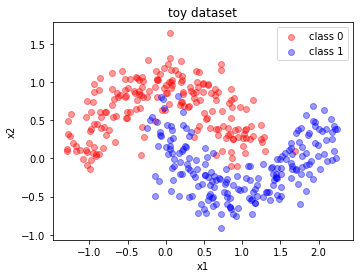

In [13]:
plt.scatter(X[y==0,0],X[y==0,1],color='r',label='class 0',alpha=0.4)
plt.scatter(X[y==1,0],X[y==1,1],color='b',label='class 1',alpha=0.4)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('toy dataset')
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

In [14]:
# 3) dimensionality reduction
# 4) feature engineering
# not necessary, data is too simplistic

# 5) select your evaluation metric
from sklearn.metrics import accuracy_score

# 6) put together the cross validation pipeline
from sklearn.ensemble import RandomForestClassifier # our model of choice for this data

# hyperparameter values to try for this model
n_estimators = [1,3,10,30,100,300,1000]
max_depth = [1,3,10,30,100]

# split data into three parts (60-20-20%)
X_rest, X_test, y_rest, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)
X_train, X_CV, y_train, y_CV = train_test_split(X_rest,y_rest,test_size = 0.25,train_size =0.75)

# check the split
print(np.shape(X_train))
print(np.shape(X_CV))
print(np.shape(X_test))

(240, 2)
(80, 2)
(80, 2)


In [15]:
# arrays for training and CV scores
train_score = np.zeros([len(n_estimators),len(max_depth)])
CV_score = np.zeros([len(n_estimators),len(max_depth)])

# loop through the combinations of hyperparameters
for n in range(len(n_estimators)):
    for m in range(len(max_depth)):
        # initialize the classifier
        clf = RandomForestClassifier(n_estimators = n_estimators[n],max_depth=max_depth[m],random_state=10)
        # fit the training data
        clf.fit(X_train,y_train)
        # predict the training data
        y_p_train = clf.predict(X_train)
        # predict the CV data
        y_p_CV = clf.predict(X_CV)
        
        # measure classifier performance with accuracy: what fraction of points are correctly classified?
        train_score[n,m] = accuracy_score(y_train,y_p_train)
        CV_score[n,m] = accuracy_score(y_CV,y_p_CV)

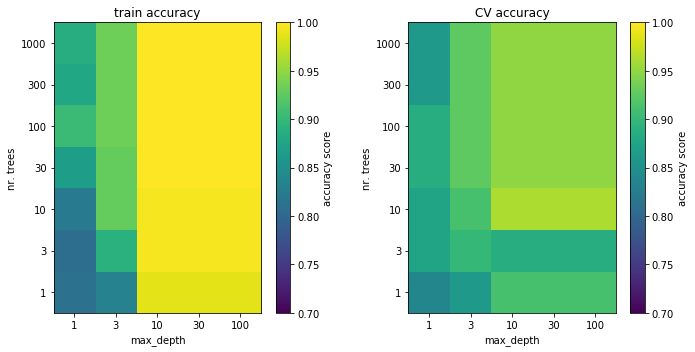

In [16]:
# plot the train and CV scores
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(train_score,origin='lower',vmin=0.7,vmax=1e0)
plt.xticks(np.arange(len(max_depth)),max_depth)
plt.yticks(np.arange(len(n_estimators)),n_estimators)
plt.xlabel('max_depth')
plt.ylabel('nr. trees')
plt.title('train accuracy')
plt.colorbar(label='accuracy score')

plt.subplot(1,2,2)
plt.imshow(CV_score,origin='lower',vmin=0.7,vmax=1e0)
plt.xticks(np.arange(len(max_depth)),max_depth)
plt.yticks(np.arange(len(n_estimators)),n_estimators)
plt.xlabel('max_depth')
plt.ylabel('nr. trees')
plt.title('CV accuracy')
plt.colorbar(label='accuracy score')

plt.tight_layout()
plt.savefig('ml_pipeline.jpg',dpi=150)

plt.show()

<center><img src="ml_pipeline.jpg" width="800"></center>

In [17]:
# initialize the best classifier
clf = RandomForestClassifier(n_estimators=10,max_depth=10,random_state=10)
# fit the training data
clf.fit(X_train,y_train)
# predict the test
y_pred = clf.predict(X_test)
# report the accuracy score of the test set
print(accuracy_score(y_test,y_pred))

# 7) train multiple models
# we won't do it this time


0.95


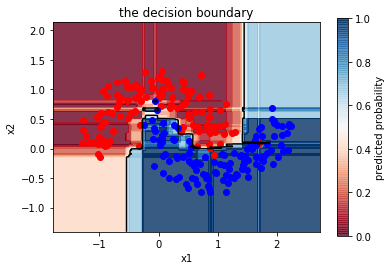

In [18]:
# 8) Interpret your model
# a simple model like this can be interpreted by plotting the decision boundary
# doesn't work for datasets with more than 2 features.
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .01  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z,vmin=0,vmax=1,levels=[0.5],colors=['k'])
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.01,0.01))
plt.colorbar(ticks=[0,0.2,0.4,0.6,0.8,1],label='predicted probability')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='r',label='class 0')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='b',label='class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('the decision boundary')
plt.gca().set_aspect('equal')
plt.savefig('decision_boundary.jpg',dpi=150)
plt.show()

<center><img src="decision_boundary.jpg" width="800"></center>